# 회귀 분석 과제

이 Jupyter Notebook은 회귀 분석 과제를 수행하기 위한 템플릿입니다.  
지정된 데이터셋을 기반으로 선형 회귀 분석을 수행하고 결과를 시각화하세요.

## 데이터셋 정보
- **데이터셋:** 캘리포니아 주택 가격 데이터셋
- **종속 변수:** `MedHouseVal` (주택의 중간 가격)
- **독립 변수:** 주택 가격에 영향을 미칠 수 있는 다양한 요인들 (예: 인구 밀도, 평균 방 개수 등)

In [1]:
# 필요한 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

# 데이터 로드
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)

# 데이터 프레임 생성
data = california.frame
data.rename(columns={'MedInc': 'MedianIncome', 'MedHouseVal': 'MedianHouseValue'}, inplace=True)

# 데이터셋 확인
data.head()

,MedianIncome,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 2023100657 임아리

### 1. 데이터 탐색 및 전처리

In [2]:
print(data.describe()) #기본 통계
print(data.isnull().sum()) #결측치 x

'''
'longitude' 위도
'latitude' 경도
'housing_median_age' 건축물 중위연령
'total_rooms' 방의 총 개수
'total_bedrooms' 침실 총 개수
'population' 인구
'households' 가구수
'median_income' 중위소득
'median_house_value' 주택 중위가격
'ocean_proximity' 해안 근접도
'''

       MedianIncome      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedianHouseValue  
count  20640.000000  20640.000000  20640.000000      20640.000000  
mean       3.070655     35.631861   -119.569704          2.068558  
std       10.386050      2.135952      2.003532          1.153956  
min        0.692

"\n'longitude' 위도\n'latitude' 경도\n'housing_median_age' 건축물 중위연령\n'total_rooms' 방의 총 개수\n'total_bedrooms' 침실 총 개수\n'population' 인구\n'households' 가구수\n'median_income' 중위소득\n'median_house_value' 주택 중위가격\n'ocean_proximity' 해안 근접도\n"

In [3]:
print(data.info()) #기본 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedianIncome      20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


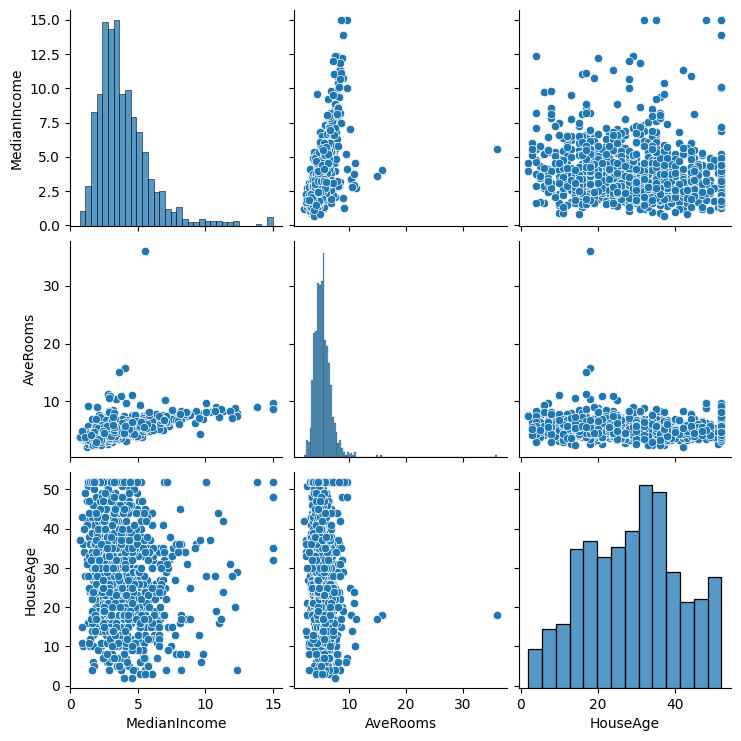

In [4]:
#관계 시각화
sample_data = data.sample(n=1000, random_state=42) 
sns.pairplot(sample_data[['MedianIncome', 'AveRooms', 'HouseAge']])

In [5]:
corr_matrix = data.corr(numeric_only=True) #관계 행렬
corr_matrix

,MedianIncome,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
MedianIncome,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedianHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [6]:
# sns.pairplot(data)
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [7]:
corr_matrix['MedianHouseValue'].sort_values(ascending=False) #관계행렬 중 MedianHouseValue와 관련 있는 행들 내림차순 정렬

MedianHouseValue    1.000000
MedianIncome        0.688075
AveRooms            0.151948
HouseAge            0.105623
AveOccup           -0.023737
Population         -0.024650
Longitude          -0.045967
AveBedrms          -0.046701
Latitude           -0.144160
Name: MedianHouseValue, dtype: float64

### 2. 단순 회귀 분석

#### 단순회귀 분석(선형회귀)

In [8]:
x = np.array(data['MedianIncome'])
y = np.array(data['MedianHouseValue'])
p = 1

np.corrcoef(x, y)[0, 1] #상관계수

0.6880752079585477

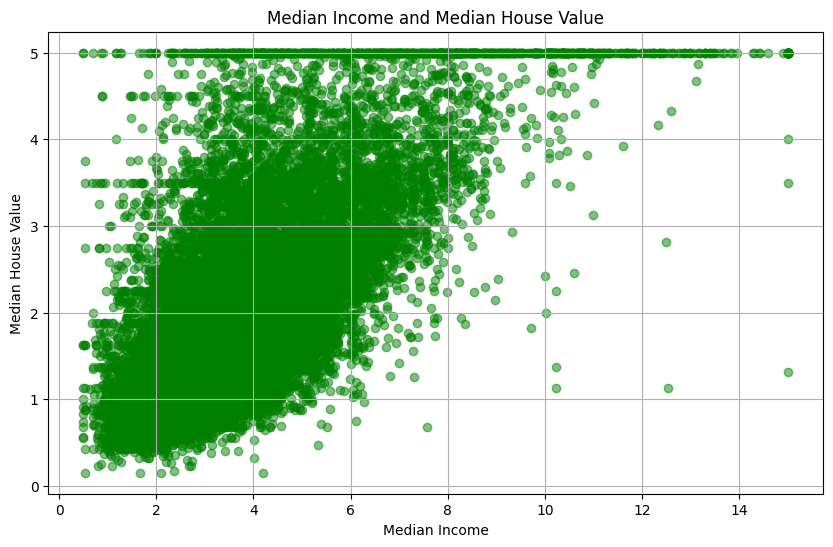

In [9]:
#독립 & 종속 변수 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color='green')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income and Median House Value')
plt.grid(True)
plt.show()

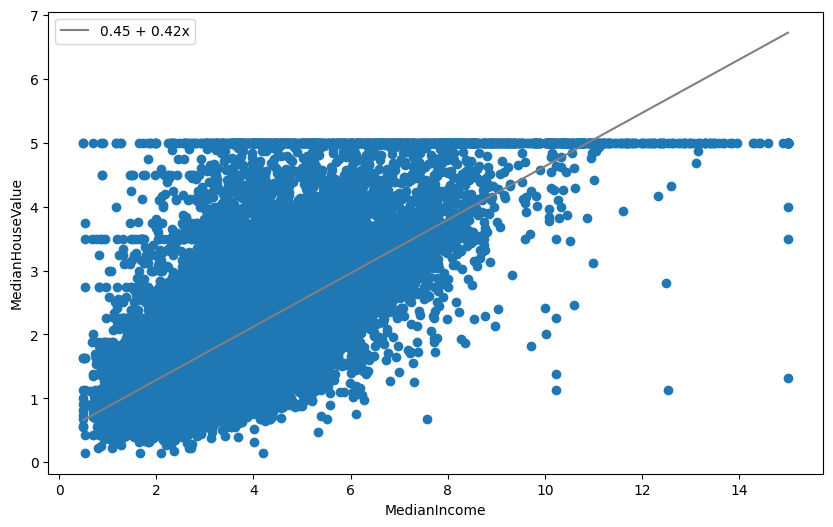

In [10]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('MedianIncome')
ax.set_ylabel('MedianHouseValue')
ax.plot(xs, ys, color = 'gray', label = f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [11]:
formula = 'MedianHouseValue ~ MedianIncome'
result = smf.ols(formula, data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:43:40   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4509      0.013     34.082      0.000       0.425       0.477
MedianIncome     0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X = np.array([np.ones_like(x), x]).T

In [13]:
beta0hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0hat, beta1_hat #회귀계수

C:\Users\dladk\AppData\Local\Temp\ipykernel_14344\3501792362.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0hat, beta1_hat = np.linalg.lstsq(X, y)[0]


(0.4508557670326826, 0.4179384920189614)

In [14]:
y_hat = beta0hat + beta1_hat * x
eps_hat = y - y_hat #잔차
print(np.mean(eps_hat)) #잔차 평균 -> 0에 편향이 없음
s_var = np.var(eps_hat, ddof=p+1)
print(s_var) #분산


1.9498614609230657e-15
0.7011990959417842


In [15]:
stats.skew(eps_hat) #왜도, 0보다 크므로 왼쪽으로 치우침. 비대칭적

1.1912191486694066

In [16]:
stats.kurtosis(eps_hat, fisher=False) #3보다크므로 굉장히 뾰족함

5.259881496386232

In [17]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2) #0에 가깝다 말할 수 있으므로 양의 상관관계

0.6545256909553079

In [18]:
mse = np.mean((y - y_hat)**2)
mse #평균제곱오차 -> 오차가 좀 크다

0.7011311502929527

In [19]:
total_var = np.sum((y-np.mean(y))**2)
exp_var = np.sum((y_hat-np.mean(y))**2)
unexp_var = np.sum(eps_hat**2)
exp_var / total_var #결정계수 -> 아직은 좋지 못한 모델이다

0.4734474918071964

In [20]:
#모형 선택
n = 20640
r_var1 = 1 - (unexp_var /(n-p-1)/(total_var/(n-1))) #자유도 조정 결정계수
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y))) #우도함수
aic1 = -2*mll + 2*(p+1) #AIC
bic1 = -2*mll + np.log(n) * (p+1) #BIC
print(r_var1, aic1, bic1)

0.47342197807000586 51249.337663283586 51265.20763572278


##### 분석
- 회귀계수 : 0.4508, 0.4179로 나타났다. 이는 독립변수가 종속변수에 미치는 영향으로 medianIncome이 증가할때마다 medianHosueValue의 영향을 보여준다.
- 결정계수 : 0.473으로 1에 가까울 수록 좋다. 아직은 그리 좋지 못한 모델이다.
- 평균제곱오차 : 0.70으로 높은 편이다. 좋지 못한 모델이다.
- 잔차 : 잔차의 대한 모델 분석을 진행했을 때 정규분포 모양이라고는 말할 수 없었다. -> 적합하지 못한 모델

### 다중 회귀 분석

#### 중회귀 모형(독립변수 2개)

In [21]:
formula = 'MedianHouseValue ~ MedianIncome + AveRooms'
result = smf.ols(formula, data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     9502.
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:43:40   Log-Likelihood:                -25505.
No. Observations:               20640   AIC:                         5.102e+04
Df Residuals:                   20637   BIC:                         5.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5950      0.016     36.836      0.000       0.563       0.627
MedianIncome     0.4342      0.003    134.497      0.000       0.428       0.440
AveRooms        -0.0381      0.002    -15.375      0.000      -0.043      -0.033
==============================================================================
Omnibus:                     4804.179   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12852.863
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                       5.949   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#중회귀 모형
x1 = data['MedianIncome']
x2 = data['AveRooms']

y = data['MedianHouseValue']

p = 2

X1 = np.array([np.ones_like(x1), x1, x2]).T
beta10_hat, beta11_hat, beta12_hat = np.linalg.lstsq(X1, y)[0]
beta10_hat, beta11_hat, beta12_hat

C:\Users\dladk\AppData\Local\Temp\ipykernel_14344\3700006699.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta10_hat, beta11_hat, beta12_hat = np.linalg.lstsq(X1, y)[0]


(0.5949584738121957, 0.4341630185374775, -0.0381106135450201)

In [23]:
y1_hat = beta10_hat + beta11_hat *x1 + beta12_hat*x2
eps_hat1 = y - y1_hat
eps_hat1

total_var = np.sum((y-np.mean(y))**2)
exp_var = np.sum((y1_hat-np.mean(y))**2)
unexp_var = np.sum(eps_hat1**2)
exp_var / total_var #결정계수

0.47941087442132885

In [24]:
#모형 선택
n = 20640
r_var2 = 1 - (unexp_var /(n-p-1)/(total_var/(n-1))) #자유도 조정 결정계수
rv = stats.norm(y1_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
aic2 = -2*mll + 2*(p+1) #AIC
bic2 = -2*mll + np.log(n) * (p+1) #BIC
print(r_var2, aic2, bic2)

0.47936042240547916 51016.24902992828 51040.05398858707


#### 중회귀 모형(독립변수 3개)

In [25]:
#중회귀 모형2
x1 = data['MedianIncome']
x2 = data['AveRooms']
x3 = data['HouseAge']

y = data['MedianHouseValue']

p = 3

X2 = np.array([np.ones_like(x1), x1, x2, x3]).T
beta20_hat, beta21_hat, beta22_hat, beta23_hat = np.linalg.lstsq(X2, y)[0]
beta20_hat, beta21_hat, beta22_hat, beta23_hat

C:\Users\dladk\AppData\Local\Temp\ipykernel_14344\878232113.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta20_hat, beta21_hat, beta22_hat, beta23_hat = np.linalg.lstsq(X2, y)[0]


(0.02040695696458486,
 0.44276339874893383,
 -0.02715343241217069,
 0.016822080316007515)

In [26]:
formula = 'MedianHouseValue ~ MedianIncome + AveRooms + HouseAge'
result = smf.ols(formula, data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MedianHouseValue   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7220.
Date:                Fri, 13 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:43:40   Log-Likelihood:                -24836.
No. Observations:               20640   AIC:                         4.968e+04
Df Residuals:                   20636   BIC:                         4.971e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0204      0.022      0.928      0.353      -0.023       0.063
MedianIncome     0.4428      0.003    141.292      0.000       0.437       0.449
AveRooms        -0.0272      0.002    -11.231      0.000      -0.032      -0.022
HouseAge         0.0168      0.000     37.185      0.000       0.016       0.018
==============================================================================
Omnibus:                     4387.129   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11558.910
Skew:                           1.150   Prob(JB):                         0.00
Kurtosis:                       5.855   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
y2_hat = beta20_hat + beta21_hat *x1 + beta22_hat*x2 + beta23_hat*x3
eps_hat2 = y - y2_hat
eps_hat2

total_var = np.sum((y-np.mean(y))**2)
exp_var = np.sum((y2_hat-np.mean(y))**2)
unexp_var = np.sum(eps_hat2**2)
exp_var / total_var #결정계수

0.5121018839958514

In [28]:
#모형 선택
n = 20640
r_var3 = 1 - (unexp_var /(n-p-1)/(total_var/(n-1))) #자유도 조정 결정계수
rv = stats.norm(y2_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
aic3 = -2*mll + 2*(p+1) #AIC
bic3 = -2*mll + np.log(n) * (p+1) #BIC
print(r_var3, aic3, bic3)

0.5120309548260523 49679.652176355885 49711.39212123427


#### 머신러닝활용 선형회귀

##### 독립 변수 1개

In [29]:
#머신러닝
X = data[['MedianIncome']] 
y = data['MedianHouseValue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'회귀 계수: {model.coef_}')
print(f'절편: {model.intercept_}')
print(f'R^2: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')


회귀 계수: [0.41933849]
절편: 0.44459729169078677
R^2: 0.45885918903846656
MSE: 0.7091157771765548


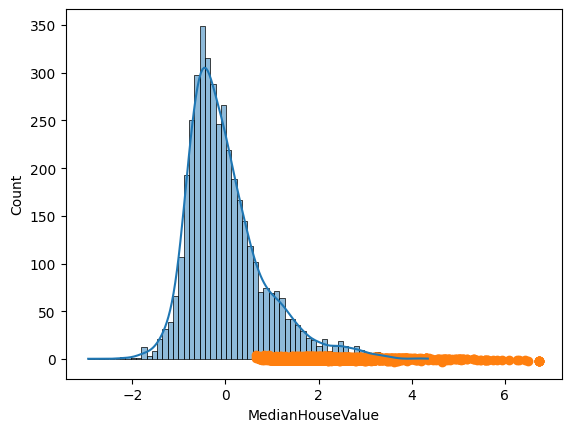

In [30]:
#잔차분석
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.scatter(y_pred, residuals)

##### 독립 변수 2개

In [31]:
#독립변수 2개
X = data[['MedianIncome', 'AveRooms']]  #독립 변수 2개 선택
y = data['MedianHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:

#모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측
y_pred = model.predict(X_test)

#성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'회귀 계수: {model.coef_}')
print(f'절편: {model.intercept_}')
print(f'R^2: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

회귀 계수: [ 0.43626089 -0.04017161]
절편: 0.5972677793933256
R^2: 0.4641710652437856
MSE: 0.7021550469058006


##### 독립 변수 3개

In [33]:
#위에서 살펴봤듯이 아래 3개의 변수들이 예측하려는 집 값과 가장 관련있음
#분석기법을 사용했을 때도 가장 적합함

#최적 모델(변수 3개)
X = data[['MedianIncome', 'AveRooms', 'HouseAge']]  # 독립 변수 3개 선택
y = data['MedianHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:

#모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

#예측
y_pred = model.predict(X_test)

#성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'회귀 계수: {model.coef_}')
print(f'절편: {model.intercept_}')
print(f'R^2: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

회귀 계수: [ 0.4447578  -0.02814968  0.01683623]
절편: 0.017295645283372352
R^2: 0.49717158850807075
MSE: 0.6589108649336336


##### 작은 결론
- 독립변수 3개를 다 쓰는 것이 좋은 모델이다. (자유도 조절, AIC, BIC를 통해 알아냄)
- 독립변수 3개는 각각 'MedianIncome', 'AveRooms', 'HouseAge'

### 결과 시각화(최적 모델 기준 -> 독립변수 3개['MedianIncome', 'AveRooms', 'HouseAge'])

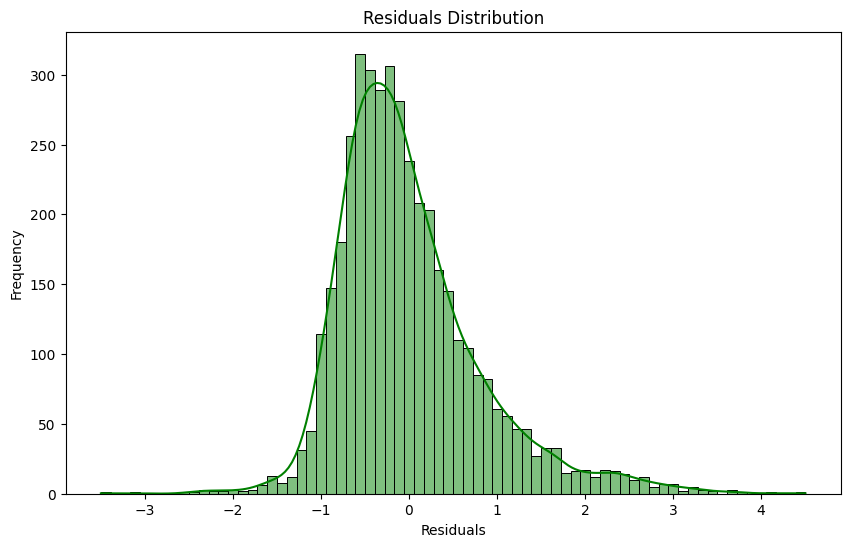

In [35]:
#잔차 계산
residuals = y_test - y_pred

#잔차 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


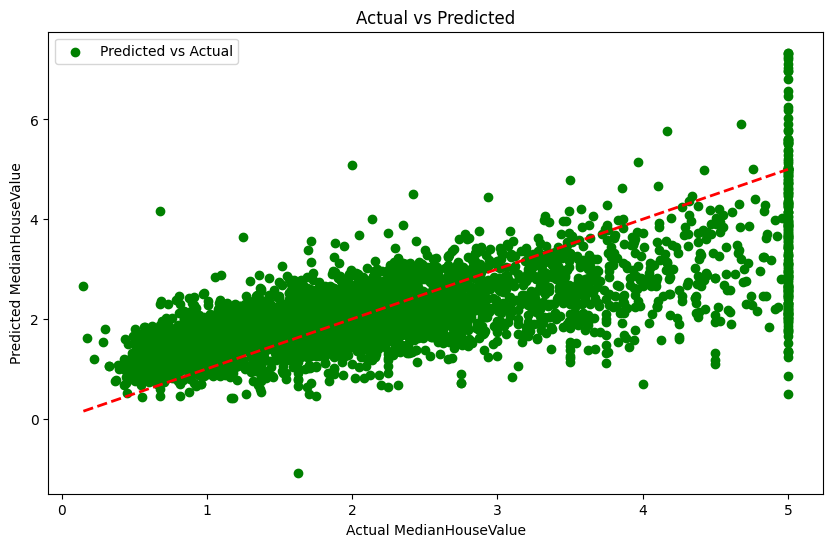

In [36]:
#실제 값과 예측 값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MedianHouseValue')
plt.ylabel('Predicted MedianHouseValue')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

### 결과

변수 선택 기법을 활용하여  캘리포니아 주택 가격 데이터에서 주택 중간 가격(MedianHouseValue)과 독립 변수들 간의 상관관계를 분석해봤을 때
중위소득이 주택 가격과 과장 밀접하다(양의 상관관계)
-> 소득 수준이 높을 수록 집 가격이 높다

방 개수의 평균과도 어느정도 양의 상관관계를 가진다.
-> 방 개수가 많은 수록 집 가격 높음

건축 연령과도 양의 상관관계를 가진다
->건축 연령이 높을수록 집 가격이 높음

다른 음의 상관관계를 가진 변수들은 집 값을 하락시키는 원인이었다.
예 : 공항과의 거리, 인구 밀도 순

회귀계수, MSE, 자유도조절계수, AIC, BIC를 계산해본 결과

중위소득
MSE : 0.7011311502929527
잔차 평균 : 1.9498614609230657e-15
결정계수 : 0.4734474918071964
자유도 조절, AIC, BIC : 0.47342197807000586 51249.337663283586 51265.20763572278

중위소득 + 방 개수
MSE: 0.7021550469058006
결정계수: 0.4641710652437856
자유도 조절, AIC, BIC : 0.47936042240547916 51016.24902992828 51040.05398858707

중위소득 + 방 개수 + 건물 연령
MSE: 0.6589108649336336
결정계수: 0.49717158850807075
자유도 조절, AIC, BIC : 0.5120309548260523 49679.652176355885 49711.39212123427

독립변수 3개를 이용한 중위소득 + 방 개수 + 건물 연령 모델이 가장 적합함을 알 수 있었다.
중위소득에서 방 개수를 추가했을 때 결정 계수는 약간 줄어들었으나, MSE가 줄어들고 다른 모델 기법을 통해 분석했을 때도 꽤 적합한 모델임을 보여준다.
독립변수 3개를 사용했을 때 MSE 평균 제곱 오차가 줄어들고 있다. 이는 예측값과 실제값의 차가 줄어들어 더 적합한 모델이 되어가고 있음을 알려준다.
AIC, BIC 모델 기법을 통해 분석해봤을 때도 점점 점수가 줄어들고 있음을 보여준다(점수가 낮을수록 좋은 모델)

## 과제 지시사항

### 1. 데이터 탐색 및 전처리
- 데이터셋의 기본 통계를 확인하고, 결측치가 있는지 점검하세요.
- 독립 변수와 종속 변수 간의 관계를 시각화하고, 상관계수를 계산하세요.

### 2. 단순 회귀 분석
- 하나의 독립 변수를 선택하여 `MedianHouseValue`를 예측하는 선형 회귀 모델을 구축하세요.
- 회귀 계수, 결정 계수 (\(R^2\)), 평균 제곱 오차 (MSE)를 계산하고 해석하세요.
- 잔차 분석을 통해 모델 적합성을 평가하세요.

### 3. 다중 회귀 분석
- 여러 독립 변수를 사용하여 `MedianHouseValue`를 예측하는 선형 회귀 모델을 구축하세요.
- 모델 성능을 평가하고, 주요 변수를 식별하세요.
- 변수 선택 기법을 사용하여 최적의 모델을 구성하세요.

### 4. 결과 시각화 및 보고서 작성
- 분석 결과를 시각화하고 주요 발견 사항을 요약하세요.
- 코드 결과 및 시각화 결과를 저장하고 해당 .ipynb 파일을 결과물로 제출해주세요.